In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [10]:
# Define the base directory where your image classes are stored
base_directory = 'Train'
classes = 10  # You should set the number of classes according to your dataset

data = []   # To store image data
labels = []  # To store class labels

for i in range(classes):
    path = os.path.join(base_directory, str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Use os.path.join to create the full path
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error processing image: {e}")

data = np.array(data)
labels = np.array(labels)


In [11]:
print(data.shape, labels.shape)

(14670, 30, 30, 3) (14670,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11736, 30, 30, 3) (2934, 30, 30, 3) (11736,) (2934,)


In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(y_train.shape, y_test.shape)

(11736, 43) (2934, 43)


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
184/184 [==============================] - 27s 140ms/step - loss: 2.2473 - accuracy: 0.3447 - val_loss: 0.7830 - val_accuracy: 0.7897
Epoch 2/25
184/184 [==============================] - 30s 164ms/step - loss: 0.7954 - accuracy: 0.7548 - val_loss: 0.3304 - val_accuracy: 0.9271
Epoch 3/25
184/184 [==============================] - 31s 167ms/step - loss: 0.4945 - accuracy: 0.8501 - val_loss: 0.1957 - val_accuracy: 0.9506
Epoch 4/25
184/184 [==============================] - 29s 158ms/step - loss: 0.3831 - accuracy: 0.8821 - val_loss: 0.1265 - val_accuracy: 0.9669
Epoch 5/25
184/184 [==============================] - 34s 186ms/step - loss: 0.3237 - accuracy: 0.8983 - val_loss: 0.1197 - val_accuracy: 0.9741
Epoch 6/25
184/184 [==============================] - 37s 201ms/step - loss: 0.2257 - accuracy: 0.9320 - val_loss: 0.0696 - val_accuracy: 0.9816
Epoch 7/25
184/184 [==============================] - 32s 174ms/step - loss: 0.2011 - accuracy: 0.9390 - val_loss: 0.0726 - val_ac

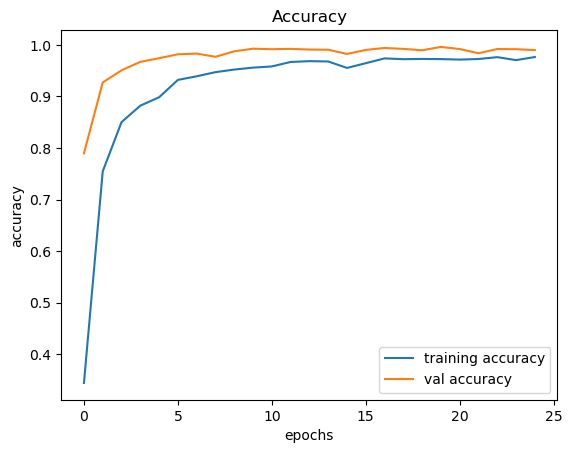

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

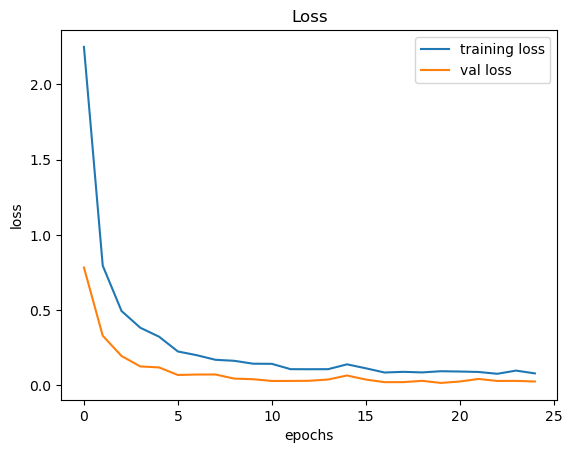

In [19]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
model.save("traffic_classifiers.h5")